### Import libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

### Load data

In [66]:
power_data = pd.read_csv("data_combined/power_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)
temp_data = pd.read_csv("data_combined/temp_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)
evaflow_data = pd.read_csv("data_combined/evaflow_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)
conflow_data = pd.read_csv("data_combined/conflow_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)
zonepump_data = pd.read_csv("data_combined/zonepump_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)

In [67]:
power_data.sort_index().head()

,gatewayId,linkQuality,ieee,receivedSync,randTime,ch1Watt,ch2Watt,ch3Watt,totalPositiveWattHour,totalNegativeWattHour,...,ch1Hz,ch2Hz,ch3Hz,i1THD,i2THD,i3THD,v1THD,v2THD,v3THD,chiller
ts,,,,,,,,,,,,,,,,,,,,,
2017-05-01 00:00:25.676,18,165,d5e87f,NaN,NaN,0,0,0,68030300.0,42100400.0,...,60.03,60.03,60.03,0.0,0.0,0.0,1.1,0.9,1.1,4
2017-05-01 00:00:33.787,18,191,d5ea33,NaN,NaN,325,0,324,74676600.0,32191800.0,...,60.02,60.02,60.02,10.1,0.0,9.1,1.1,1.1,1.1,2
2017-05-01 00:00:35.405,18,181,d5dddb,NaN,NaN,349,0,353,27545200.0,13124600.0,...,60.03,60.03,60.03,13.7,0.0,8.9,1.1,1.0,1.2,1
2017-05-01 00:00:36.619,18,191,d5dd85,NaN,NaN,0,0,0,153470700.0,99991300.0,...,60.03,60.03,60.03,0.0,0.0,0.0,1.1,0.9,1.2,3
2017-05-01 00:01:12.757,18,191,d5dd85,NaN,NaN,0,0,0,153470700.0,99991300.0,...,59.89,59.89,59.89,0.0,0.0,0.0,1.5,1.1,1.5,3


### Load error log

In [68]:
error_Aug = pd.read_csv("data_errorlog/Equipment Error Log_2017-08-01_2017-08-31.csv")
error3_Aug = error_Aug[error_Aug['Equipment ID'] == 'ch3']
error3_Aug['Start'] = pd.to_datetime(error3_Aug['Start'])
error3_Aug = error3_Aug.set_index('Start')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
error_Aug

,Start,End,Equipment ID,Error Type,Status
0,2017-08-08 12:05:10.0,2017-08-08 12:13:10.0,ch1,TRIP,Historical
1,2017-08-12 08:56:10.0,2017-08-14 08:04:10.0,ch1,TRIP,Historical
2,2017-08-08 11:38:10.0,2017-08-08 12:14:10.0,ch2,TRIP,Historical
3,2017-08-08 12:19:10.0,2017-08-08 12:39:10.0,ch2,TRIP,Historical
4,2017-08-11 18:53:10.0,2017-08-14 08:04:10.0,ch2,TRIP,Historical
5,2017-08-08 11:14:10.0,2017-08-08 11:44:10.0,ch3,TRIP,Historical
6,2017-08-08 11:47:10.0,2017-08-08 12:14:10.0,ch3,TRIP,Historical
7,2017-08-08 12:34:10.0,2017-08-08 12:39:10.0,ch3,TRIP,Historical
8,2017-08-08 12:40:10.0,2017-08-08 12:41:10.0,ch3,TRIP,Historical
9,2017-08-08 12:50:10.0,2017-08-08 13:00:10.0,ch3,TRIP,Historical


### Filter by Chiller 3

In [70]:
power3 = power_data[power_data['chiller'] == 3]
temp3 = temp_data[temp_data['chiller'] == 3]
evaflow3 = evaflow_data[evaflow_data['chiller'] == 3]
conflow3 = conflow_data[conflow_data['chiller'] == 3]

### Filter by August

In [71]:
power3_Aug = power3[pd.DatetimeIndex(power3.index).month == 8]
temp3_Aug = temp3[pd.DatetimeIndex(temp3.index).month == 8]
evaflow3_Aug = evaflow3[pd.DatetimeIndex(evaflow3.index).month == 8]
conflow3_Aug = conflow3[pd.DatetimeIndex(conflow3.index).month == 8]
zonepump_Aug = zonepump_data[pd.DatetimeIndex(zonepump_data.index).month == 8]

### Process data to standardize index

In [72]:
# round down timestamps to nearest min
power3_Aug_cleaned = power3_Aug.set_index(
                        pd.to_datetime(power3_Aug.index).floor('min'))

# remove instances with duplicated index
power3_Aug_cleaned = power3_Aug_cleaned[
                        [not d for d in power3_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
power3_Aug_cleaned = power3_Aug_cleaned.reindex(
                        pd.date_range(
                            power3_Aug_cleaned.index[0].date(),
                            power3_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
power3_Aug_cleaned = power3_Aug_cleaned.fillna(method='ffill')
power3_Aug_cleaned = power3_Aug_cleaned.fillna(method='bfill')

In [73]:
# round down timestamps to nearest min
temp3_Aug_cleaned = temp3_Aug.set_index(
                        pd.to_datetime(temp3_Aug.index).floor('min'))

# remove instances with duplicated index
temp3_Aug_cleaned = temp3_Aug_cleaned[
                        [not d for d in temp3_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
temp3_Aug_cleaned = temp3_Aug_cleaned.reindex(
                        pd.date_range(
                            temp3_Aug_cleaned.index[0].date(),
                            temp3_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
temp3_Aug_cleaned = temp3_Aug_cleaned.fillna(method='ffill')
temp3_Aug_cleaned = temp3_Aug_cleaned.fillna(method='bfill')

In [74]:
# round down timestamps to nearest min
evaflow3_Aug_cleaned = evaflow3_Aug.set_index(
                        pd.to_datetime(evaflow3_Aug.index).floor('min'))

# remove instances with duplicated index
evaflow3_Aug_cleaned = evaflow3_Aug_cleaned[
                        [not d for d in evaflow3_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
evaflow3_Aug_cleaned = evaflow3_Aug_cleaned.reindex(
                        pd.date_range(
                            evaflow3_Aug_cleaned.index[0].date(),
                            evaflow3_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
evaflow3_Aug_cleaned = evaflow3_Aug_cleaned.fillna(method='ffill')
evaflow3_Aug_cleaned = evaflow3_Aug_cleaned.fillna(method='bfill')

In [75]:
# round down timestamps to nearest min
conflow3_Aug_cleaned = conflow3_Aug.set_index(
                        pd.to_datetime(conflow3_Aug.index).floor('min'))

# remove instances with duplicated index
conflow3_Aug_cleaned = conflow3_Aug_cleaned[
                        [not d for d in conflow3_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
conflow3_Aug_cleaned = conflow3_Aug_cleaned.reindex(
                        pd.date_range(
                            conflow3_Aug_cleaned.index[0].date(),
                            conflow3_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
conflow3_Aug_cleaned = conflow3_Aug_cleaned.fillna(method='ffill')
conflow3_Aug_cleaned = conflow3_Aug_cleaned.fillna(method='bfill')

In [76]:
# round down timestamps to nearest min
zonepump_Aug_cleaned = zonepump_Aug.set_index(
                        pd.to_datetime(zonepump_Aug.index).floor('min'))

# remove instances with duplicated index
zonepump_Aug_cleaned = zonepump_Aug_cleaned[
                        [not d for d in zonepump_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
zonepump_Aug_cleaned = zonepump_Aug_cleaned.reindex(
                        pd.date_range(
                            zonepump_Aug_cleaned.index[0].date(),
                            zonepump_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
zonepump_Aug_cleaned = zonepump_Aug_cleaned.fillna(method='ffill')
zonepump_Aug_cleaned = zonepump_Aug_cleaned.fillna(method='bfill')

### Process error log data

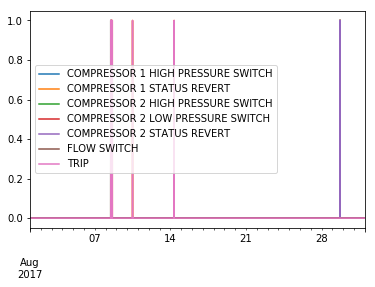

In [77]:
# create boolean columns that indicate presence/absence of error at each timestamp
bin_Aug_Error = pd.get_dummies(error3_Aug['Error Type'])

# round down timestamps to nearest min
bin_Aug_Error = bin_Aug_Error.set_index(
                        pd.to_datetime(bin_Aug_Error.index).floor('min'))

# merge rows having the same timestamp, by summing their values in each column
bin_Aug_Error = bin_Aug_Error.groupby(by=bin_Aug_Error.index).sum()

# expand the error occurrences to include timestamps from time t-5 to time t
expanded_Aug_Error = pd.DataFrame(columns=bin_Aug_Error.columns)
for i in range(len(bin_Aug_Error)):
    curr_data = bin_Aug_Error.iloc[i]
    curr_timestamp = curr_data.name
    for j in range(6):
        curr_data.rename(curr_timestamp - pd.Timedelta(minutes=j), inplace=True)
        expanded_Aug_Error = expanded_Aug_Error.append(curr_data)

# merge rows having the same timestamp, by summing their values in each column
expanded_Aug_Error = expanded_Aug_Error.groupby(by=expanded_Aug_Error.index).sum()

# set index to every minute mark
expanded_Aug_Error = expanded_Aug_Error.reindex(
                        pd.date_range(
                            "2017-08-01 00:00:00",
                            "2017-08-31 23:59:00",
                            freq='min'))

# fill any newly created rows with 0
expanded_Aug_Error = expanded_Aug_Error.fillna(value = 0)

# assign back to the original name so that the rest of the code works
bin_Aug_Error = expanded_Aug_Error

_ = bin_Aug_Error.plot()

### Compile shortlisted data features into one dataframe

In [78]:
shortlisted_features = pd.DataFrame()

shortlisted_features['pm_ch1Watt'] = power3_Aug_cleaned['ch1Watt']
shortlisted_features['pm_ch2Watt'] = power3_Aug_cleaned['ch2Watt']
shortlisted_features['pm_ch3Watt'] = power3_Aug_cleaned['ch3Watt']
shortlisted_features['pm_totalPositiveWattHour'] = power3_Aug_cleaned['totalPositiveWattHour']

shortlisted_features['zp_ch1Watt'] = zonepump_Aug_cleaned['ch1Watt']
shortlisted_features['zp_ch2Watt'] = zonepump_Aug_cleaned['ch2Watt']
shortlisted_features['zp_ch3Watt'] = zonepump_Aug_cleaned['ch3Watt']
shortlisted_features['zp_totalPositiveWattHour'] = zonepump_Aug_cleaned['totalPositiveWattHour']

shortlisted_features['evaflow_flowRate'] = evaflow3_Aug_cleaned['flowRate']
shortlisted_features['evaflow_flowSpeed'] = evaflow3_Aug_cleaned['flowSpeed']
shortlisted_features['evaflow_totalFlowRate'] = evaflow3_Aug_cleaned['totalFlowRate']

shortlisted_features['conflow_flowRate'] = conflow3_Aug_cleaned['flowRate']
shortlisted_features['conflow_flowSpeed'] = conflow3_Aug_cleaned['flowSpeed']
shortlisted_features['conflow_totalFlowRate'] = conflow3_Aug_cleaned['totalFlowRate']

shortlisted_features['chilled_supply'] = temp3_Aug_cleaned['value1']
shortlisted_features['chilled_return'] = temp3_Aug_cleaned['value2']
shortlisted_features['cooling_supply'] = temp3_Aug_cleaned['value3']
shortlisted_features['cooling_return'] = temp3_Aug_cleaned['value4']

shortlisted_features.describe()

,pm_ch1Watt,pm_ch2Watt,pm_ch3Watt,pm_totalPositiveWattHour,zp_ch1Watt,zp_ch2Watt,zp_ch3Watt,zp_totalPositiveWattHour,evaflow_flowRate,evaflow_flowSpeed,evaflow_totalFlowRate,conflow_flowRate,conflow_flowSpeed,conflow_totalFlowRate,chilled_supply,chilled_return,cooling_supply,cooling_return
count,44641.000000,44641.000000,44641.000000,4.464100e+04,44641.000000,44641.000000,44641.000000,4.464100e+04,44641.000000,44641.000000,4.464100e+04,44641.000000,44641.000000,44641.000000,44641.000000,44641.000000,44641.000000,44641.000000
mean,17011.682848,15411.493291,15170.003091,2.355632e+08,10456.928675,10054.908828,10141.172375,1.589351e+08,99.913366,1.488469,5.661548e+07,90.992346,0.782949,604251.278892,11.784512,16.442928,31.394366,30.492275
std,21728.082372,19715.481636,19781.890830,8.784331e+06,6149.180694,6031.340051,6108.019494,6.073980e+06,109.157953,1.626191,3.428267e+07,100.317127,0.863185,17901.765654,3.259743,6.113229,2.035288,2.118837
min,0.000000,0.000000,0.000000,2.207777e+08,0.000000,-126.000000,-158.000000,1.487329e+08,-0.695376,-0.010359,1.899000e+03,0.000000,0.000000,575884.000000,6.180115,6.585998,24.754639,23.280641
25%,0.000000,0.000000,0.000000,2.294874e+08,4126.000000,3837.000000,3799.000000,1.535478e+08,0.473952,0.007060,3.071903e+07,0.000000,0.000000,591380.000000,9.042663,11.755677,29.956362,29.197998
50%,0.000000,0.000000,0.000000,2.321433e+08,12743.000000,12257.000000,12387.000000,1.588647e+08,1.091899,0.016267,4.369722e+07,0.000000,0.000000,596886.000000,11.830444,14.180297,31.206056,30.778809
75%,33552.000000,30690.000000,28755.000000,2.442880e+08,15927.000000,15280.000000,15436.000000,1.643631e+08,219.244141,3.266211,9.441004e+07,199.395859,1.715714,622618.000000,14.992064,21.496887,33.021852,32.039187
max,77850.000000,72069.000000,74304.000000,2.534820e+08,26039.000000,25421.000000,25705.000000,1.694728e+08,237.080795,3.531925,9.999830e+07,795.410706,6.844161,639959.000000,21.219178,28.567812,41.534729,35.863041


### Calculate Heat Capacity Rate (kW)

In [79]:
# water density obtained according to example in slides (units: kg/cubicmetre)
# evaflow converted from litre-per-min to cubicmetre-per-hr
hcr = \
(999.68844162593 \
* shortlisted_features['evaflow_totalFlowRate'] * 0.06 \
* 4.19 \
* (shortlisted_features['chilled_return'] - shortlisted_features['chilled_supply'])) \
/ 3600

shortlisted_features['hcr'] = hcr

hcr.describe()

count    4.464100e+04
mean     2.120330e+07
std      2.341912e+07
min     -7.108702e+06
25%      4.107975e+06
50%      1.209830e+07
75%      2.628627e+07
max      9.476662e+07
dtype: float64

### Calculate Coefficient of Performance (kW)

In [80]:
cop = hcr/(shortlisted_features['pm_totalPositiveWattHour']/1000)

shortlisted_features['cop'] = cop

cop.describe()

count    44641.000000
mean        91.893546
std        102.950723
min        -29.099678
25%         16.856446
50%         50.676655
75%        116.322935
max        412.770334
dtype: float64

### Normalize data

In [81]:
hcr_norm = (shortlisted_features['hcr'] - shortlisted_features['hcr'].mean()) / shortlisted_features['hcr'].std()
cop_norm = (shortlisted_features['cop'] - shortlisted_features['cop'].mean()) / shortlisted_features['cop'].std()
pm_norm = (shortlisted_features['pm_totalPositiveWattHour'] - shortlisted_features['pm_totalPositiveWattHour'].mean()) / shortlisted_features['pm_totalPositiveWattHour'].std()
chs_norm = (shortlisted_features['chilled_supply'] - shortlisted_features['chilled_supply'].mean()) / shortlisted_features['chilled_supply'].std()
chr_norm = (shortlisted_features['chilled_return'] - shortlisted_features['chilled_return'].mean()) / shortlisted_features['chilled_return'].std()
evaFR_norm = (shortlisted_features['evaflow_totalFlowRate'] - shortlisted_features['evaflow_totalFlowRate'].mean()) / shortlisted_features['evaflow_totalFlowRate'].std()

In [82]:
error3_Aug_occ = list(bin_Aug_Error[list(bin_Aug_Error.sum(axis=1) > 0)].index)

### Plot the graphs

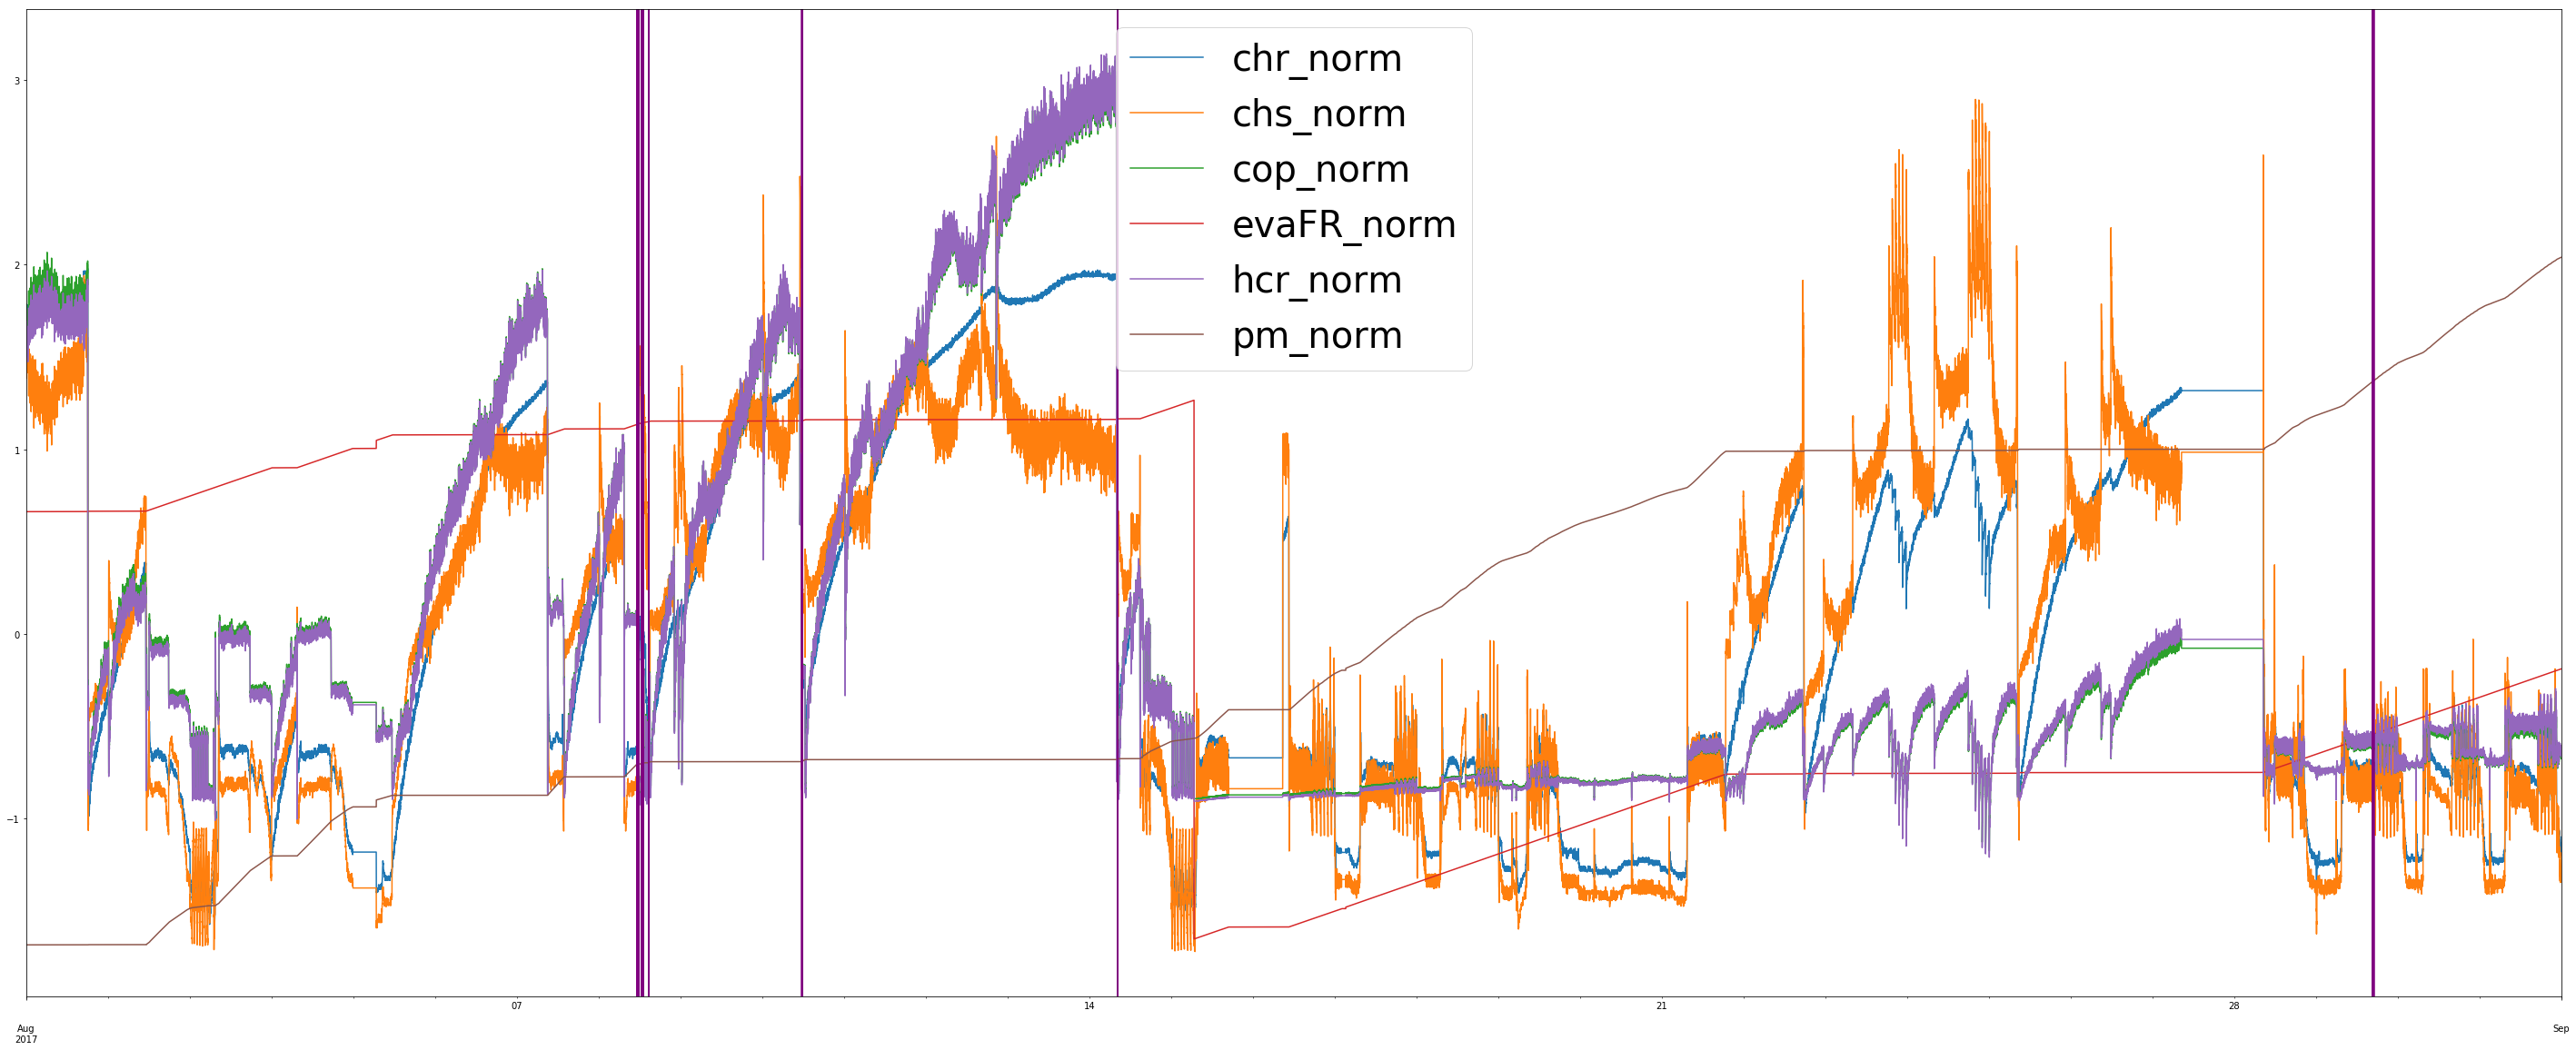

In [86]:
pd.DataFrame(data={'hcr_norm': hcr_norm,
                   'cop_norm': cop_norm,
                   'pm_norm': pm_norm,
                   'chs_norm': chs_norm,
                   'chr_norm': chr_norm,
                   'evaFR_norm': evaFR_norm}).plot(figsize=[50,20])

for ts in error3_Aug_occ:
    plt.axvline(ts, color='purple') # vertical lines in purple indicate error occurence(s)
    
plt.legend(prop={'size': 40})
plt.show()

### Zoomed in version of graph above

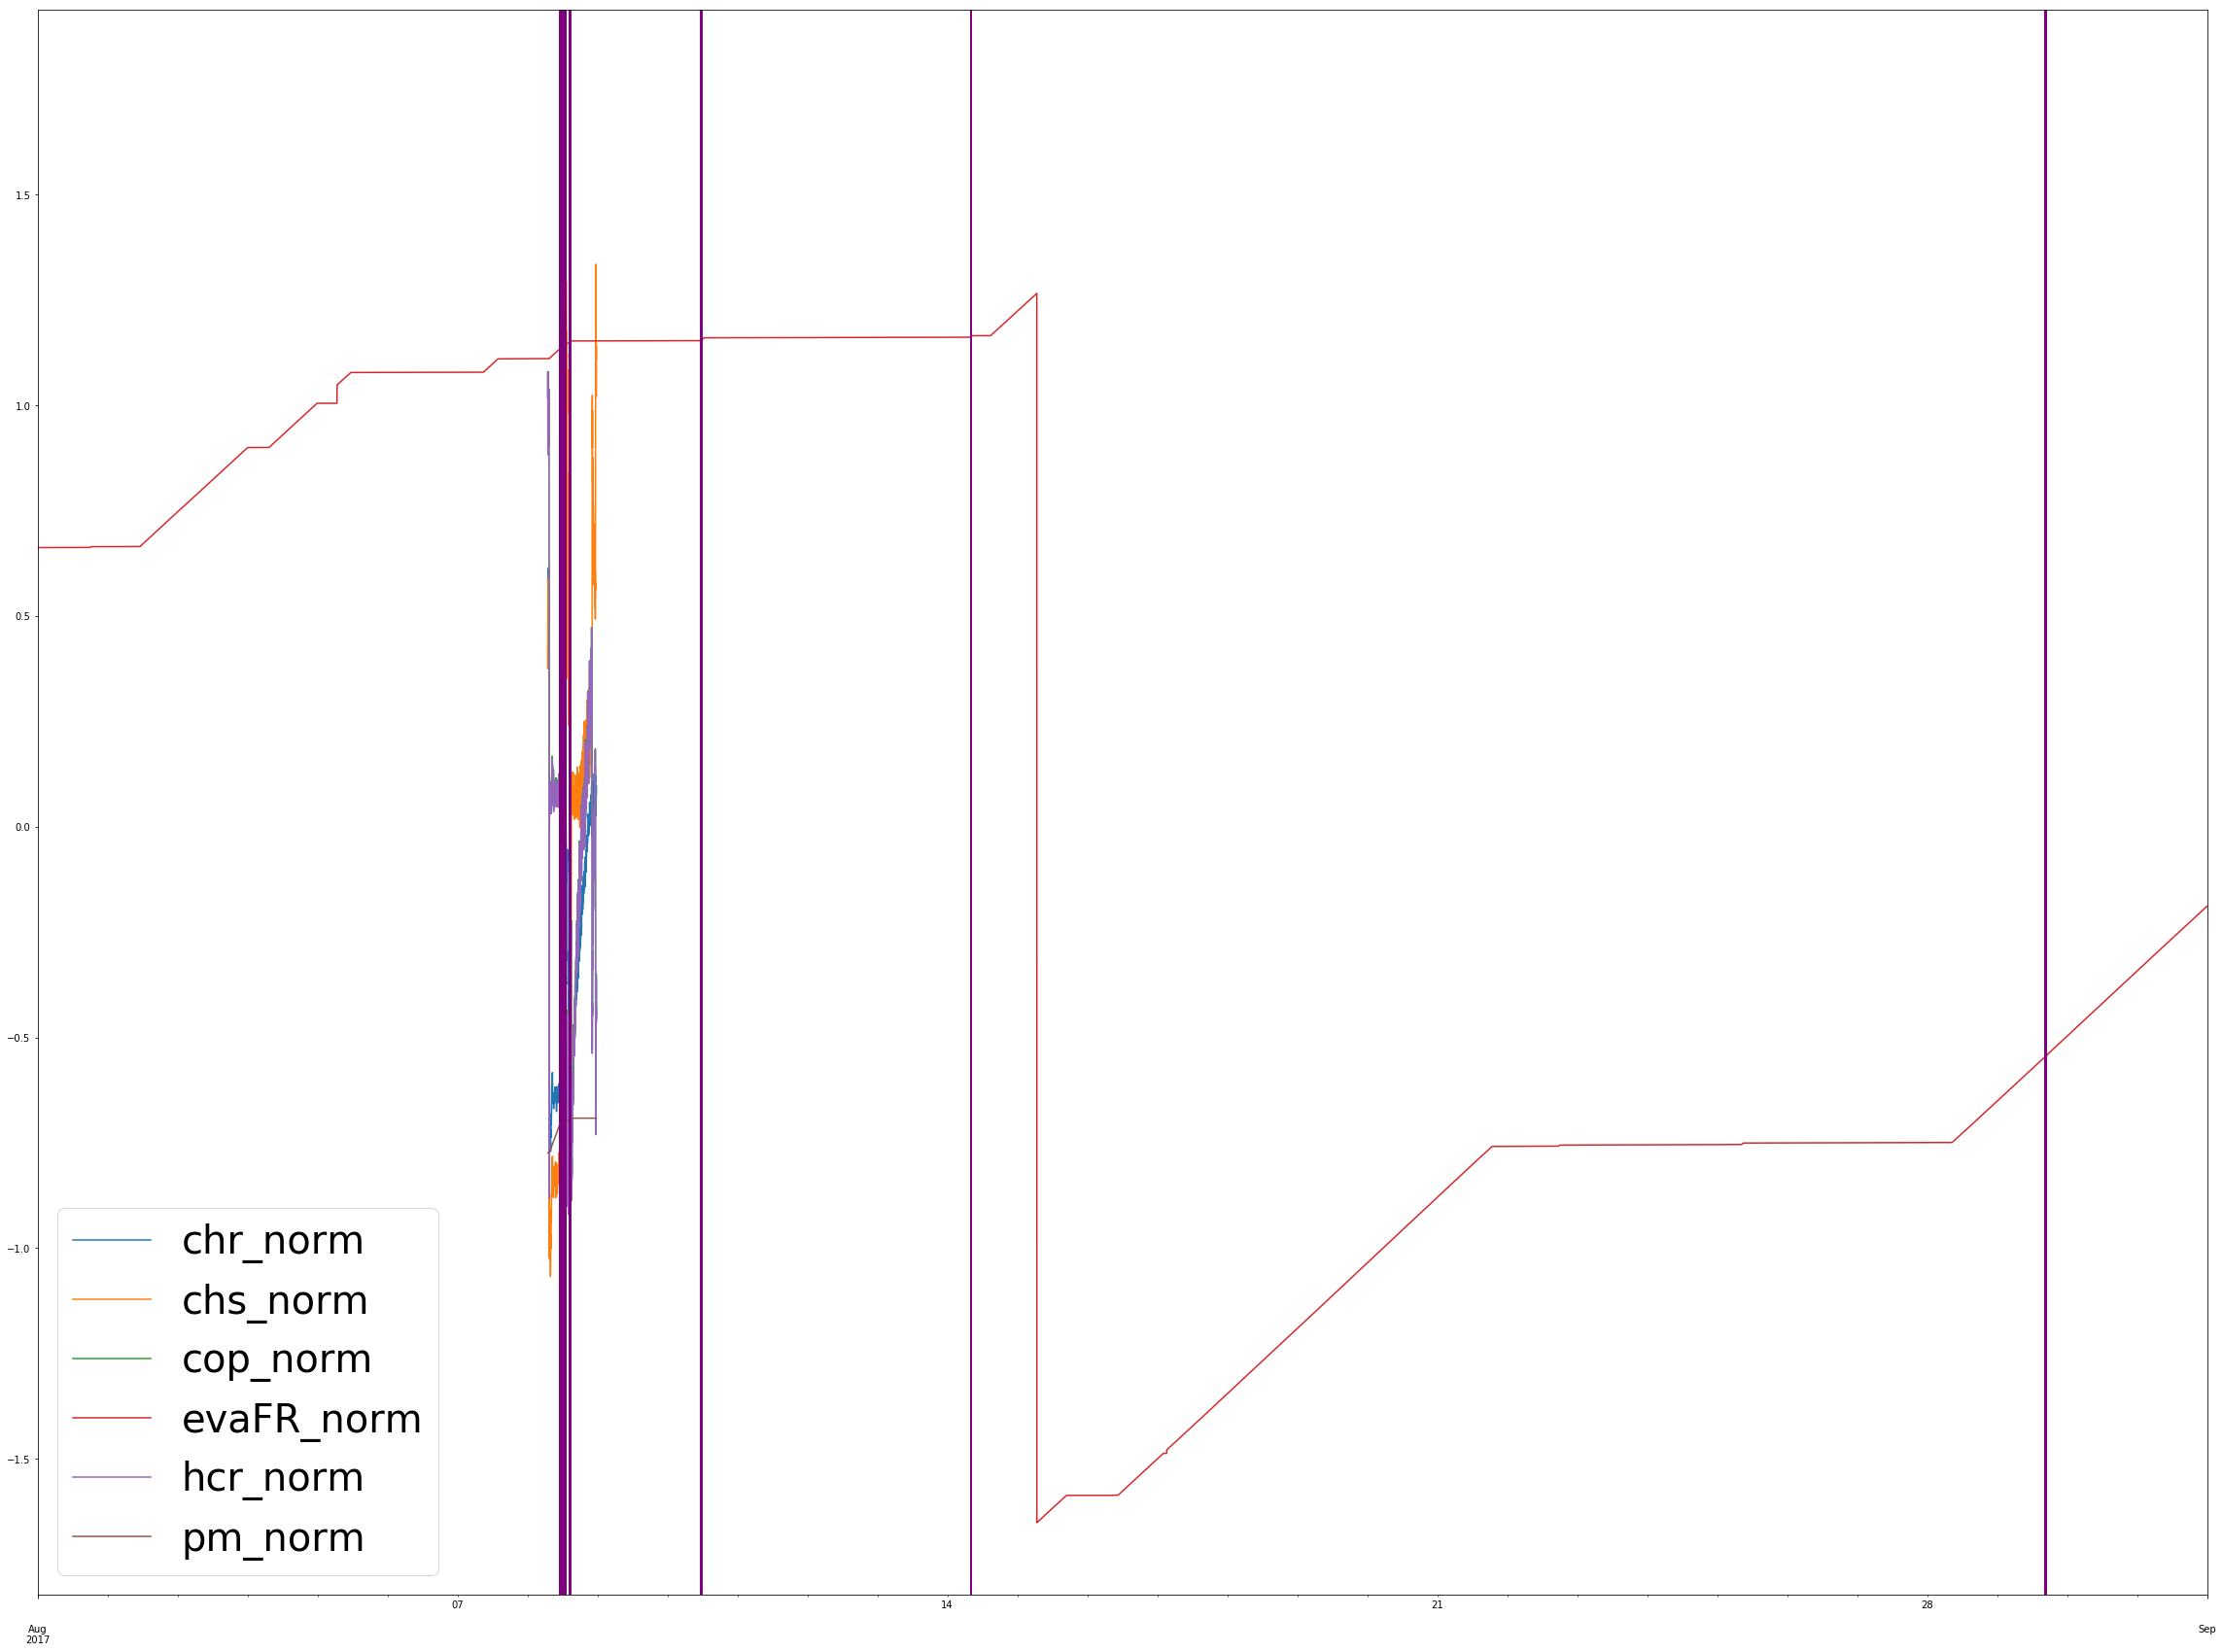

In [91]:
pd.DataFrame(data={'hcr_norm': hcr_norm[10500:11500],
                   'cop_norm': cop_norm[10500:11500],
                   'pm_norm': pm_norm[10500:11500],
                   'chs_norm': chs_norm[10500:11500],
                   'chr_norm': chr_norm[10500:11500],
                   'evaFR_norm': evaFR_norm}).plot(figsize=[40,30])

for ts in list(error3_Aug_occ):
    plt.axvline(ts, color='purple')
    
plt.legend(prop={'size': 40})
plt.show()

### Over-sampling to balance classification (using SMOTE)

In [21]:
#http://contrib.scikit-learn.org/imbalanced-learn/stable/over_sampling.html#smote-adasyn
from imblearn.over_sampling import SMOTE

# Building the AutoEncoder

In [22]:
#!pip install tflearn

from __future__ import division, print_function, absolute_import
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import batch_normalization, local_response_normalization
from tflearn.layers.estimator import regression

import tensorflow as tf

import numpy as np
import pandas as pd

from sklearn import preprocessing

from sklearn.decomposition import PCA

from scipy.stats import skew
from scipy.stats.stats import pearsonr

from sklearn.model_selection import train_test_split

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [23]:
# takes in a dataframe and performs windowing
# returns a dataframe with the newly created columns (i.e. windows)
def perform_windowing(input_df, window_size = 20, horizon =1):
    output_col_names = []
    for dayNum in range(window_size):
        for col_name in input_df.columns:
            output_col_names.append(col_name + "_" + str(dayNum))
    output_df = pd.DataFrame(columns=output_col_names)
    for window_idx in range(window_size):
        for col_idx in range(len(input_df.columns)):
            output_df[str(input_df.columns[col_idx]) + "_" + str(window_idx)] = \
            input_df[str(input_df.columns[col_idx])].shift(window_idx+horizon)
    return output_df[window_size-1:]

In [24]:
window_size = 20
horizon = 1
dataWindow = perform_windowing(shortlisted_features, window_size, horizon)
dataWindow = dataWindow.dropna()
dataWindowVal = dataWindow.values
dataWindowNorm = preprocessing.normalize(dataWindowVal, axis = 0) # along features
dataWindowNorm = pd.DataFrame(dataWindowNorm, columns=dataWindow.columns, index=dataWindow.index)

#frames = [bin_Aug_Error[window_size-1:], dataWindowNorm]
#AugDataWindowDropNorm = pd.concat(frames, axis = 1, join_axes=[dataWindowNorm.index])

#AugDataWindowDropNorm.describe()

In [25]:
#AugDataWindowDropNorm

In [26]:
total_error = bin_Aug_Error[window_size-1:]
total_error

,COMPRESSOR 1 HIGH PRESSURE SWITCH,COMPRESSOR 1 STATUS REVERT,COMPRESSOR 2 HIGH PRESSURE SWITCH,COMPRESSOR 2 LOW PRESSURE SWITCH,COMPRESSOR 2 STATUS REVERT,FLOW SWITCH,TRIP
2017-08-01 00:19:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01 00:21:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01 00:22:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01 00:23:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01 00:24:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01 00:25:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01 00:26:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01 00:27:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01 00:28:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
def binary_maker(series):
    for i in range(len(series)):
        if(series[i] != 0):
            series[i] = 1
    return series

In [28]:
combined_label_data = pd.DataFrame()
combined_label_data['label_0'] = total_error.sum(axis = 1)
combined_label_data['label_0']
y = binary_maker(combined_label_data['label_0'])
combined_label_data['error?'] = y

frames = [combined_label_data['error?'], dataWindowNorm]
AugDataWindowDropNorm = pd.concat(frames, axis = 1, join_axes=[dataWindowNorm.index])

In [29]:
# Check whether Errors are properly transfered
# AugDataWindowDropNorm['COMPRESSOR 1 STATUS REVERT'].nonzero()
AugDataWindowDropNorm = AugDataWindowDropNorm.dropna()

In [30]:
errorRows = AugDataWindowDropNorm[list(AugDataWindowDropNorm['error?'] > 0)]
nonErrorRows = AugDataWindowDropNorm[list(AugDataWindowDropNorm['error?'] == 0)]
nonErrorRowsSampled = nonErrorRows.sample(n = len(errorRows))
final_sampled_data = pd.concat([errorRows, nonErrorRowsSampled])
final_sampled_data = final_sampled_data.sort_index()
final_sampled_data

,error?,pm_ch1Watt_0,pm_ch2Watt_0,pm_ch3Watt_0,pm_totalPositiveWattHour_0,zp_ch1Watt_0,zp_ch2Watt_0,zp_ch3Watt_0,zp_totalPositiveWattHour_0,evaflow_flowRate_0,...,evaflow_totalFlowRate_19,conflow_flowRate_19,conflow_flowSpeed_19,conflow_totalFlowRate_19,chilled_supply_19,chilled_return_19,cooling_supply_19,cooling_return_19,hcr_19,cop_19
2017-08-02 00:18:00,0.0,0.000000,0.000000,0.000000,0.004434,0.001249,0.001178,0.001143,0.004447,1.800801e-05,...,0.005678,0.000000,0.000000,0.004510,0.004402,0.003852,0.004615,0.004712,0.002413,0.002501
2017-08-03 07:45:00,0.0,0.006980,0.006863,0.006679,0.004472,0.001435,0.001409,0.001344,0.004468,6.922844e-03,...,0.005995,0.006925,0.006925,0.004542,0.003769,0.002604,0.004175,0.004256,-0.000075,-0.000077
2017-08-03 07:54:00,0.0,0.006222,0.005990,0.005905,0.004472,0.001349,0.001390,0.001384,0.004468,7.052676e-03,...,0.005997,0.006999,0.006999,0.004543,0.003385,0.002979,0.004765,0.004479,0.002014,0.002071
2017-08-03 20:12:00,0.0,0.007135,0.006933,0.006596,0.004510,0.002803,0.002690,0.002771,0.004483,7.015670e-03,...,0.006190,0.006974,0.006974,0.004562,0.003492,0.003039,0.004811,0.004560,0.002030,0.002070
2017-08-04 01:26:00,0.0,0.000000,0.000000,0.000000,0.004519,0.001029,0.001012,0.000872,0.004485,1.604328e-05,...,0.006255,0.000000,0.000000,0.004569,0.003538,0.002705,0.004345,0.004396,0.000811,0.000825
2017-08-04 12:03:00,0.0,0.009847,0.009869,0.010093,0.004534,0.006376,0.006455,0.006290,0.004492,6.981369e-03,...,0.006323,0.007102,0.007102,0.004575,0.003501,0.003365,0.005247,0.004808,0.003170,0.003216
2017-08-05 00:21:00,0.0,0.004879,0.004425,0.003995,0.004565,0.001670,0.001556,0.001511,0.004506,7.054166e-03,...,0.006512,0.006937,0.006937,0.004595,0.002827,0.002489,0.004545,0.004380,0.001831,0.001844
2017-08-05 07:09:00,0.0,0.002880,0.002824,0.002696,0.004572,0.001584,0.001516,0.001543,0.004509,6.816158e-03,...,0.006620,0.006861,0.006861,0.004605,0.002562,0.002131,0.004421,0.004320,0.001241,0.001248
2017-08-05 18:30:00,0.0,0.000000,0.000000,0.000000,0.004577,0.001586,0.001516,0.001448,0.004512,2.366586e-05,...,0.006692,0.000000,0.000000,0.004612,0.004526,0.003771,0.004834,0.004934,0.002237,0.002247
2017-08-07 07:30:00,0.0,0.000000,0.000000,0.000000,0.004577,0.001610,0.001460,0.001438,0.004525,-8.956475e-07,...,0.006693,0.000000,0.000000,0.004612,0.005767,0.006622,0.004623,0.004888,0.009441,0.009484


In [31]:
train_set = final_sampled_data[:final_sampled_data.shape[0]] 
#the above basically returns the entire AugData because shape is the full dimension 
train_set = np.array(train_set)

test_set = final_sampled_data[final_sampled_data.shape[0]:]
test_set = np.array(test_set)

train_set

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          4.71220675e-03,   2.41251374e-03,   2.50149973e-03],
       [  0.00000000e+00,   6.97986835e-03,   6.86252341e-03, ...,
          4.25564252e-03,  -7.49151758e-05,  -7.70301949e-05],
       [  0.00000000e+00,   6.22210798e-03,   5.99040436e-03, ...,
          4.47896203e-03,   2.01410432e-03,   2.07085155e-03],
       ..., 
       [  0.00000000e+00,   6.37184198e-03,   6.47422143e-03, ...,
          4.20601596e-03,   7.48426025e-04,   6.81160491e-04],
       [  0.00000000e+00,   8.12971569e-03,   8.26782476e-03, ...,
          4.73040354e-03,   1.32549719e-03,   1.20274284e-03],
       [  0.00000000e+00,   7.41826480e-03,   7.36771317e-03, ...,
          4.57159817e-03,   1.33757220e-03,   1.21193856e-03]])

In [32]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
158/158 [==============================] - 3s 17ms/step - loss: 0.1908
Epoch 2/10
158/158 [==============================] - 0s 183us/step - loss: 0.0048
Epoch 3/10
158/158 [==============================] - 0s 177us/step - loss: 6.5927e-04
Epoch 4/10
158/158 [==============================] - 0s 203us/step - loss: 7.9283e-04
Epoch 5/10
158/158 [==============================] - 0s 190us/step - loss: 6.7961e-04
Epoch 6/10
158/158 [==============================] - 0s 190us/step - loss: 7.3327e-04
Epoch 7/10
158/158 [==============================] - 0s 241us/step - loss: 6.6300e-04
Epoch 8/10
158/158 [==============================] - 0s 235us/step - loss: 6.8590e-04
Epoch 9/10
158/158 [==============================] - 0s 209us/step - loss: 6.5807e-04
Epoch 10/10
158/158 [==============================] - 0s 195us/step - loss: 6.6800e-04


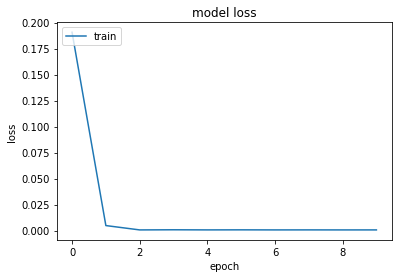

'\noriginal encoder from "Many Flavors of AE\nhttps://wiseodd.github.io/techblog/2016/12/03/autoencoders/\n'

In [33]:
# https://blog.keras.io/building-autoencoders-in-keras.html
inputs = Input(shape=(401,))
encoded = Dense(184, activation='tanh')(inputs)
encoded = Dense(92, activation='tanh')(encoded)
encoded = Dense(46, activation='tanh')(encoded)

decoded = Dense(92, activation='tanh')(encoded)
decoded = Dense(184, activation='tanh')(decoded)
outputs = Dense(401, activation='sigmoid')(decoded)

model = Model(input=inputs, output=outputs)
adamOp = keras.optimizers.Adam(lr=0.008)
model.compile(optimizer= adamOp, loss='mse')
history = model.fit(train_set, train_set, batch_size=64, nb_epoch=10)

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

"""
original encoder from "Many Flavors of AE
https://wiseodd.github.io/techblog/2016/12/03/autoencoders/
"""

In [34]:
results = final_sampled_data #pd.DataFrame(model.predict(train_set), columns = final_sampled_data.columns, index=final_sampled_data.index)

In [35]:
label_data = results.iloc[:,:1] # get the first x cols, which are the errors
training_data = results.iloc[:,1:] # get predictor features

In [36]:
#Check label data as correctly predicted
label_data = results.iloc[:,:1]
label_data[label_data['error?'] > 0]
label_data.describe()

,error?
count,158.00000
mean,0.50000
std,0.50159
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [37]:
label_data

,error?
2017-08-02 00:18:00,0.0
2017-08-03 07:45:00,0.0
2017-08-03 07:54:00,0.0
2017-08-03 20:12:00,0.0
2017-08-04 01:26:00,0.0
2017-08-04 12:03:00,0.0
2017-08-05 00:21:00,0.0
2017-08-05 07:09:00,0.0
2017-08-05 18:30:00,0.0
2017-08-07 07:30:00,0.0


In [38]:
training_data

,pm_ch1Watt_0,pm_ch2Watt_0,pm_ch3Watt_0,pm_totalPositiveWattHour_0,zp_ch1Watt_0,zp_ch2Watt_0,zp_ch3Watt_0,zp_totalPositiveWattHour_0,evaflow_flowRate_0,evaflow_flowSpeed_0,...,evaflow_totalFlowRate_19,conflow_flowRate_19,conflow_flowSpeed_19,conflow_totalFlowRate_19,chilled_supply_19,chilled_return_19,cooling_supply_19,cooling_return_19,hcr_19,cop_19
2017-08-02 00:18:00,0.000000,0.000000,0.000000,0.004434,0.001249,0.001178,0.001143,0.004447,1.800801e-05,1.800797e-05,...,0.005678,0.000000,0.000000,0.004510,0.004402,0.003852,0.004615,0.004712,0.002413,0.002501
2017-08-03 07:45:00,0.006980,0.006863,0.006679,0.004472,0.001435,0.001409,0.001344,0.004468,6.922844e-03,6.922828e-03,...,0.005995,0.006925,0.006925,0.004542,0.003769,0.002604,0.004175,0.004256,-0.000075,-0.000077
2017-08-03 07:54:00,0.006222,0.005990,0.005905,0.004472,0.001349,0.001390,0.001384,0.004468,7.052676e-03,7.052660e-03,...,0.005997,0.006999,0.006999,0.004543,0.003385,0.002979,0.004765,0.004479,0.002014,0.002071
2017-08-03 20:12:00,0.007135,0.006933,0.006596,0.004510,0.002803,0.002690,0.002771,0.004483,7.015670e-03,7.015654e-03,...,0.006190,0.006974,0.006974,0.004562,0.003492,0.003039,0.004811,0.004560,0.002030,0.002070
2017-08-04 01:26:00,0.000000,0.000000,0.000000,0.004519,0.001029,0.001012,0.000872,0.004485,1.604328e-05,1.604324e-05,...,0.006255,0.000000,0.000000,0.004569,0.003538,0.002705,0.004345,0.004396,0.000811,0.000825
2017-08-04 12:03:00,0.009847,0.009869,0.010093,0.004534,0.006376,0.006455,0.006290,0.004492,6.981369e-03,6.981352e-03,...,0.006323,0.007102,0.007102,0.004575,0.003501,0.003365,0.005247,0.004808,0.003170,0.003216
2017-08-05 00:21:00,0.004879,0.004425,0.003995,0.004565,0.001670,0.001556,0.001511,0.004506,7.054166e-03,7.054150e-03,...,0.006512,0.006937,0.006937,0.004595,0.002827,0.002489,0.004545,0.004380,0.001831,0.001844
2017-08-05 07:09:00,0.002880,0.002824,0.002696,0.004572,0.001584,0.001516,0.001543,0.004509,6.816158e-03,6.816142e-03,...,0.006620,0.006861,0.006861,0.004605,0.002562,0.002131,0.004421,0.004320,0.001241,0.001248
2017-08-05 18:30:00,0.000000,0.000000,0.000000,0.004577,0.001586,0.001516,0.001448,0.004512,2.366586e-05,2.366580e-05,...,0.006692,0.000000,0.000000,0.004612,0.004526,0.003771,0.004834,0.004934,0.002237,0.002247
2017-08-07 07:30:00,0.000000,0.000000,0.000000,0.004577,0.001610,0.001460,0.001438,0.004525,-8.956475e-07,-8.956454e-07,...,0.006693,0.000000,0.000000,0.004612,0.005767,0.006622,0.004623,0.004888,0.009441,0.009484


# Creating the Neural Network

In [39]:
"""
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(200, input_dim=400, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
    
estimator = KerasClassifier(build_fn=create_baseline, nb_epoch=10, batch_size=5, verbose=0)
results = cross_val_score(estimator, training_data, label_data)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

#results = pd.DataFrame(model.predict(train_set), columns = final_sampled_data.columns, index=final_sampled_data.index)
#label_data = results.iloc[:,:1] # get the first x cols, which are the errors
#label_data[label_data['error?'] == 0]
"""

'\ndef create_baseline():\n\t# create model\n\tmodel = Sequential()\n\tmodel.add(Dense(200, input_dim=400, kernel_initializer=\'normal\', activation=\'relu\'))\n\tmodel.add(Dense(1, kernel_initializer=\'normal\', activation=\'sigmoid\'))\n\t# Compile model\n\tmodel.compile(loss=\'binary_crossentropy\', optimizer=\'adam\', metrics=[\'accuracy\'])\n\treturn model\n    \nestimator = KerasClassifier(build_fn=create_baseline, nb_epoch=10, batch_size=5, verbose=0)\nresults = cross_val_score(estimator, training_data, label_data)\nprint("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))\n\n#results = pd.DataFrame(model.predict(train_set), columns = final_sampled_data.columns, index=final_sampled_data.index)\n#label_data = results.iloc[:,:1] # get the first x cols, which are the errors\n#label_data[label_data[\'error?\'] == 0]\n'

In [40]:
y_train = label_data[int(len(label_data)*0.7):]
y_test = label_data[:int(len(label_data)*0.7)]
x_train = training_data[int(len(training_data)*0.7):]
x_test = training_data[:int(len(training_data)*0.7)]

In [41]:
y_train

,error?
2017-08-21 05:15:00,0.0
2017-08-21 09:11:00,0.0
2017-08-21 15:13:00,0.0
2017-08-21 18:51:00,0.0
2017-08-22 02:43:00,0.0
2017-08-22 05:08:00,0.0
2017-08-22 19:49:00,0.0
2017-08-22 21:00:00,0.0
2017-08-23 15:42:00,0.0
2017-08-23 21:06:00,0.0


In [42]:
y_test

,error?
2017-08-02 00:18:00,0.0
2017-08-03 07:45:00,0.0
2017-08-03 07:54:00,0.0
2017-08-03 20:12:00,0.0
2017-08-04 01:26:00,0.0
2017-08-04 12:03:00,0.0
2017-08-05 00:21:00,0.0
2017-08-05 07:09:00,0.0
2017-08-05 18:30:00,0.0
2017-08-07 07:30:00,0.0


In [43]:
x_train

,pm_ch1Watt_0,pm_ch2Watt_0,pm_ch3Watt_0,pm_totalPositiveWattHour_0,zp_ch1Watt_0,zp_ch2Watt_0,zp_ch3Watt_0,zp_totalPositiveWattHour_0,evaflow_flowRate_0,evaflow_flowSpeed_0,...,evaflow_totalFlowRate_19,conflow_flowRate_19,conflow_flowSpeed_19,conflow_totalFlowRate_19,chilled_supply_19,chilled_return_19,cooling_supply_19,cooling_return_19,hcr_19,cop_19
2017-08-21 05:15:00,0.002629,0.002409,0.002337,0.004868,0.000803,0.000747,0.000766,0.004815,0.007035,0.007035,...,0.001970,0.006778,0.006778,0.004854,0.002744,0.002273,0.003807,0.003682,0.000385,0.000363
2017-08-21 09:11:00,0.006925,0.006605,0.007456,0.004875,0.005177,0.005182,0.005207,0.004818,0.006982,0.006982,...,0.002033,0.006999,0.006999,0.004860,0.003699,0.003400,0.005030,0.004600,0.000905,0.000854
2017-08-21 15:13:00,0.010004,0.009903,0.011093,0.004894,0.006964,0.006942,0.007214,0.004826,0.006904,0.006904,...,0.002128,0.007020,0.007020,0.004869,0.003807,0.003506,0.005208,0.004783,0.000984,0.000924
2017-08-21 18:51:00,0.000000,0.000000,0.000000,0.004905,0.004909,0.004900,0.004908,0.004832,0.000025,0.000025,...,0.002185,0.006998,0.006998,0.004875,0.003228,0.003088,0.005012,0.004616,0.000993,0.000931
2017-08-22 02:43:00,0.000000,0.000000,0.000000,0.004905,0.002315,0.002225,0.002255,0.004841,0.000024,0.000024,...,0.002189,0.000000,0.000000,0.004875,0.004824,0.004261,0.004532,0.004684,0.001067,0.001000
2017-08-22 05:08:00,0.000000,0.000000,0.000000,0.004905,0.002427,0.002315,0.002352,0.004842,0.000037,0.000037,...,0.002189,0.000000,0.000000,0.004875,0.004704,0.004532,0.004503,0.004682,0.001488,0.001394
2017-08-22 19:49:00,0.000000,0.000000,0.000000,0.004906,0.004051,0.003993,0.003940,0.004859,0.000006,0.000006,...,0.002197,0.000000,0.000000,0.004876,0.004208,0.003224,0.004424,0.004486,0.000347,0.000325
2017-08-22 21:00:00,0.000000,0.000000,0.000000,0.004906,0.003858,0.003827,0.003948,0.004860,0.000014,0.000014,...,0.002197,0.000000,0.000000,0.004876,0.004166,0.003437,0.004512,0.004542,0.000635,0.000595
2017-08-23 15:42:00,0.000000,0.000000,0.000000,0.004906,0.006919,0.006770,0.006953,0.004877,0.000009,0.000009,...,0.002198,0.000000,0.000000,0.004876,0.005684,0.005564,0.004990,0.005104,0.001909,0.001789
2017-08-23 21:06:00,0.000000,0.000000,0.000000,0.004906,0.007506,0.007532,0.007548,0.004885,0.000023,0.000023,...,0.002198,0.000000,0.000000,0.004876,0.007259,0.005503,0.004779,0.005139,0.000529,0.000495


In [44]:
x_test

,pm_ch1Watt_0,pm_ch2Watt_0,pm_ch3Watt_0,pm_totalPositiveWattHour_0,zp_ch1Watt_0,zp_ch2Watt_0,zp_ch3Watt_0,zp_totalPositiveWattHour_0,evaflow_flowRate_0,evaflow_flowSpeed_0,...,evaflow_totalFlowRate_19,conflow_flowRate_19,conflow_flowSpeed_19,conflow_totalFlowRate_19,chilled_supply_19,chilled_return_19,cooling_supply_19,cooling_return_19,hcr_19,cop_19
2017-08-02 00:18:00,0.000000,0.000000,0.000000,0.004434,0.001249,0.001178,0.001143,0.004447,1.800801e-05,1.800797e-05,...,0.005678,0.000000,0.000000,0.004510,0.004402,0.003852,0.004615,0.004712,0.002413,0.002501
2017-08-03 07:45:00,0.006980,0.006863,0.006679,0.004472,0.001435,0.001409,0.001344,0.004468,6.922844e-03,6.922828e-03,...,0.005995,0.006925,0.006925,0.004542,0.003769,0.002604,0.004175,0.004256,-0.000075,-0.000077
2017-08-03 07:54:00,0.006222,0.005990,0.005905,0.004472,0.001349,0.001390,0.001384,0.004468,7.052676e-03,7.052660e-03,...,0.005997,0.006999,0.006999,0.004543,0.003385,0.002979,0.004765,0.004479,0.002014,0.002071
2017-08-03 20:12:00,0.007135,0.006933,0.006596,0.004510,0.002803,0.002690,0.002771,0.004483,7.015670e-03,7.015654e-03,...,0.006190,0.006974,0.006974,0.004562,0.003492,0.003039,0.004811,0.004560,0.002030,0.002070
2017-08-04 01:26:00,0.000000,0.000000,0.000000,0.004519,0.001029,0.001012,0.000872,0.004485,1.604328e-05,1.604324e-05,...,0.006255,0.000000,0.000000,0.004569,0.003538,0.002705,0.004345,0.004396,0.000811,0.000825
2017-08-04 12:03:00,0.009847,0.009869,0.010093,0.004534,0.006376,0.006455,0.006290,0.004492,6.981369e-03,6.981352e-03,...,0.006323,0.007102,0.007102,0.004575,0.003501,0.003365,0.005247,0.004808,0.003170,0.003216
2017-08-05 00:21:00,0.004879,0.004425,0.003995,0.004565,0.001670,0.001556,0.001511,0.004506,7.054166e-03,7.054150e-03,...,0.006512,0.006937,0.006937,0.004595,0.002827,0.002489,0.004545,0.004380,0.001831,0.001844
2017-08-05 07:09:00,0.002880,0.002824,0.002696,0.004572,0.001584,0.001516,0.001543,0.004509,6.816158e-03,6.816142e-03,...,0.006620,0.006861,0.006861,0.004605,0.002562,0.002131,0.004421,0.004320,0.001241,0.001248
2017-08-05 18:30:00,0.000000,0.000000,0.000000,0.004577,0.001586,0.001516,0.001448,0.004512,2.366586e-05,2.366580e-05,...,0.006692,0.000000,0.000000,0.004612,0.004526,0.003771,0.004834,0.004934,0.002237,0.002247
2017-08-07 07:30:00,0.000000,0.000000,0.000000,0.004577,0.001610,0.001460,0.001438,0.004525,-8.956475e-07,-8.956454e-07,...,0.006693,0.000000,0.000000,0.004612,0.005767,0.006622,0.004623,0.004888,0.009441,0.009484


In [46]:
model = Sequential()
model.add(Dense(800, input_dim=400, activation='tanh'))
model.add(Dense(400, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(np.array(x_train), np.array(y_train),
          epochs=20,
          batch_size=128)

score = model.evaluate(np.array(x_test), np.array(y_test), batch_size=48)

Epoch 1/20
48/48 [==============================] - 1s 12ms/step - loss: 0.6931 - acc: 0.6250
Epoch 2/20
48/48 [==============================] - 0s 480us/step - loss: 0.6390 - acc: 0.6250
Epoch 3/20
48/48 [==============================] - 0s 418us/step - loss: 0.5630 - acc: 0.6250
Epoch 4/20
48/48 [==============================] - 0s 460us/step - loss: 0.5146 - acc: 0.7708
Epoch 5/20
48/48 [==============================] - 0s 417us/step - loss: 0.5063 - acc: 0.6250
Epoch 6/20
48/48 [==============================] - 0s 439us/step - loss: 0.5154 - acc: 0.7292
Epoch 7/20
48/48 [==============================] - 0s 445us/step - loss: 0.4746 - acc: 0.6250
Epoch 8/20
48/48 [==============================] - 0s 454us/step - loss: 0.4432 - acc: 0.7917
Epoch 9/20
48/48 [==============================] - 0s 460us/step - loss: 0.4259 - acc: 0.9167
Epoch 10/20
48/48 [==============================] - 0s 480us/step - loss: 0.4184 - acc: 0.7917
Epoch 11/20
48/48 [==============================]

# Predict October data for Chiller 3

In [47]:
power3 = power_data[power_data['chiller'] == 3]
temp3 = temp_data[temp_data['chiller'] == 3]
evaflow3 = evaflow_data[evaflow_data['chiller'] == 3]
conflow3 = conflow_data[conflow_data['chiller'] == 3]

power3_Aug = power3[pd.DatetimeIndex(power3.index).month == 10]
temp3_Aug = temp3[pd.DatetimeIndex(temp3.index).month == 10]
evaflow3_Aug = evaflow3[pd.DatetimeIndex(evaflow3.index).month == 10]
conflow3_Aug = conflow3[pd.DatetimeIndex(conflow3.index).month == 10]
zonepump_Aug = zonepump_data[pd.DatetimeIndex(zonepump_data.index).month == 10]

In [48]:
error_Aug = pd.read_csv("data_errorlog/Equipment Error Log_2017-10-01_2017-10-31.csv")
error3_Aug = error_Aug[error_Aug['Equipment ID'] == 'ch3']
error3_Aug['Start'] = pd.to_datetime(error3_Aug['Start'])
error3_Aug = error3_Aug.set_index('Start')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
# round down timestamps to nearest min
power3_Aug_cleaned = power3_Aug.set_index(
                        pd.to_datetime(power3_Aug.index).floor('min'))

# remove instances with duplicated index
power3_Aug_cleaned = power3_Aug_cleaned[
                        [not d for d in power3_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
power3_Aug_cleaned = power3_Aug_cleaned.reindex(
                        pd.date_range(
                            power3_Aug_cleaned.index[0].date(),
                            power3_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
power3_Aug_cleaned = power3_Aug_cleaned.fillna(method='ffill')
power3_Aug_cleaned = power3_Aug_cleaned.fillna(method='bfill')

In [50]:
# round down timestamps to nearest min
temp3_Aug_cleaned = temp3_Aug.set_index(
                        pd.to_datetime(temp3_Aug.index).floor('min'))

# remove instances with duplicated index
temp3_Aug_cleaned = temp3_Aug_cleaned[
                        [not d for d in temp3_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
temp3_Aug_cleaned = temp3_Aug_cleaned.reindex(
                        pd.date_range(
                            temp3_Aug_cleaned.index[0].date(),
                            temp3_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
temp3_Aug_cleaned = temp3_Aug_cleaned.fillna(method='ffill')
temp3_Aug_cleaned = temp3_Aug_cleaned.fillna(method='bfill')

In [51]:
# round down timestamps to nearest min
evaflow3_Aug_cleaned = evaflow3_Aug.set_index(
                        pd.to_datetime(evaflow3_Aug.index).floor('min'))

# remove instances with duplicated index
evaflow3_Aug_cleaned = evaflow3_Aug_cleaned[
                        [not d for d in evaflow3_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
evaflow3_Aug_cleaned = evaflow3_Aug_cleaned.reindex(
                        pd.date_range(
                            evaflow3_Aug_cleaned.index[0].date(),
                            evaflow3_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
evaflow3_Aug_cleaned = evaflow3_Aug_cleaned.fillna(method='ffill')
evaflow3_Aug_cleaned = evaflow3_Aug_cleaned.fillna(method='bfill')

In [52]:
# round down timestamps to nearest min
conflow3_Aug_cleaned = conflow3_Aug.set_index(
                        pd.to_datetime(conflow3_Aug.index).floor('min'))

# remove instances with duplicated index
conflow3_Aug_cleaned = conflow3_Aug_cleaned[
                        [not d for d in conflow3_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
conflow3_Aug_cleaned = conflow3_Aug_cleaned.reindex(
                        pd.date_range(
                            conflow3_Aug_cleaned.index[0].date(),
                            conflow3_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
conflow3_Aug_cleaned = conflow3_Aug_cleaned.fillna(method='ffill')
conflow3_Aug_cleaned = conflow3_Aug_cleaned.fillna(method='bfill')

In [53]:
# round down timestamps to nearest min
zonepump_Aug_cleaned = zonepump_Aug.set_index(
                        pd.to_datetime(zonepump_Aug.index).floor('min'))

# remove instances with duplicated index
zonepump_Aug_cleaned = zonepump_Aug_cleaned[
                        [not d for d in zonepump_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
zonepump_Aug_cleaned = zonepump_Aug_cleaned.reindex(
                        pd.date_range(
                            zonepump_Aug_cleaned.index[0].date(),
                            zonepump_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
zonepump_Aug_cleaned = zonepump_Aug_cleaned.fillna(method='ffill')
zonepump_Aug_cleaned = zonepump_Aug_cleaned.fillna(method='bfill')

### Process error log data

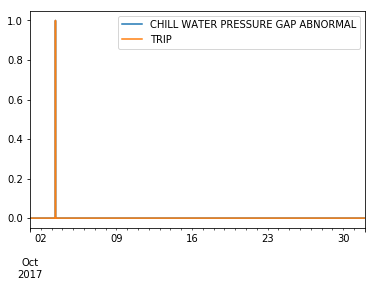

In [54]:
# create boolean columns that indicate presence/absence of error at each timestamp
bin_Aug_Error = pd.get_dummies(error3_Aug['Error Type'])

# round down timestamps to nearest min
bin_Aug_Error = bin_Aug_Error.set_index(
                        pd.to_datetime(bin_Aug_Error.index).floor('min'))

# merge rows having the same timestamp, by summing their values in each column
bin_Aug_Error = bin_Aug_Error.groupby(by=bin_Aug_Error.index).sum()

# expand the error occurrences to include timestamps from time t-5 to time t
expanded_Aug_Error = pd.DataFrame(columns=bin_Aug_Error.columns)
for i in range(len(bin_Aug_Error)):
    curr_data = bin_Aug_Error.iloc[i]
    curr_timestamp = curr_data.name
    for j in range(6):
        curr_data.rename(curr_timestamp - pd.Timedelta(minutes=j), inplace=True)
        expanded_Aug_Error = expanded_Aug_Error.append(curr_data)

# merge rows having the same timestamp, by summing their values in each column
expanded_Aug_Error = expanded_Aug_Error.groupby(by=expanded_Aug_Error.index).sum()

# set index to every minute mark
expanded_Aug_Error = expanded_Aug_Error.reindex(
                        pd.date_range(
                            "2017-10-01 00:00:00",
                            "2017-10-31 23:59:00",
                            freq='min'))

# fill any newly created rows with 0
expanded_Aug_Error = expanded_Aug_Error.fillna(value = 0)

# assign back to the original name so that the rest of the code works
bin_Aug_Error = expanded_Aug_Error

_ = bin_Aug_Error.plot()

### Compile shortlisted data features into one dataframe

In [55]:
shortlisted_features = pd.DataFrame()

shortlisted_features['pm_ch1Watt'] = power3_Aug_cleaned['ch1Watt']
shortlisted_features['pm_ch2Watt'] = power3_Aug_cleaned['ch2Watt']
shortlisted_features['pm_ch3Watt'] = power3_Aug_cleaned['ch3Watt']
shortlisted_features['pm_totalPositiveWattHour'] = power3_Aug_cleaned['totalPositiveWattHour']

shortlisted_features['zp_ch1Watt'] = zonepump_Aug_cleaned['ch1Watt']
shortlisted_features['zp_ch2Watt'] = zonepump_Aug_cleaned['ch2Watt']
shortlisted_features['zp_ch3Watt'] = zonepump_Aug_cleaned['ch3Watt']
shortlisted_features['zp_totalPositiveWattHour'] = zonepump_Aug_cleaned['totalPositiveWattHour']

shortlisted_features['evaflow_flowRate'] = evaflow3_Aug_cleaned['flowRate']
shortlisted_features['evaflow_flowSpeed'] = evaflow3_Aug_cleaned['flowSpeed']
shortlisted_features['evaflow_totalFlowRate'] = evaflow3_Aug_cleaned['totalFlowRate']

shortlisted_features['conflow_flowRate'] = conflow3_Aug_cleaned['flowRate']
shortlisted_features['conflow_flowSpeed'] = conflow3_Aug_cleaned['flowSpeed']
shortlisted_features['conflow_totalFlowRate'] = conflow3_Aug_cleaned['totalFlowRate']

shortlisted_features['chilled_supply'] = temp3_Aug_cleaned['value1']
shortlisted_features['chilled_return'] = temp3_Aug_cleaned['value2']
shortlisted_features['cooling_supply'] = temp3_Aug_cleaned['value3']
shortlisted_features['cooling_return'] = temp3_Aug_cleaned['value4']

shortlisted_features.describe()

,pm_ch1Watt,pm_ch2Watt,pm_ch3Watt,pm_totalPositiveWattHour,zp_ch1Watt,zp_ch2Watt,zp_ch3Watt,zp_totalPositiveWattHour,evaflow_flowRate,evaflow_flowSpeed,evaflow_totalFlowRate,conflow_flowRate,conflow_flowSpeed,conflow_totalFlowRate,chilled_supply,chilled_return,cooling_supply,cooling_return
count,44641.000000,44641.000000,44641.00000,4.464100e+04,44641.000000,44641.000000,44641.000000,4.464100e+04,44641.000000,44641.000000,4.464100e+04,44641.000000,44641.000000,44641.000000,44641.000000,44641.000000,44641.000000,44641.000000
mean,12562.176004,11298.435385,11163.35398,2.912039e+08,4192.394525,3955.674066,4012.038798,1.923050e+08,100.918845,1.503445,3.968766e+07,86.221534,0.741899,717442.805089,10.269018,12.170010,27.114375,26.287562
std,17122.740254,15336.667565,15366.22182,8.485620e+06,3399.059028,3316.383856,3362.921257,2.655788e+06,106.376953,1.584758,2.291951e+07,98.665276,0.848972,19784.620936,1.855113,2.897966,3.371125,3.123144
min,0.000000,0.000000,0.00000,2.791390e+08,675.000000,457.000000,475.000000,1.870578e+08,-0.399285,-0.005948,8.834563e+06,0.000000,0.000000,691008.000000,6.938476,8.156128,16.989442,16.594237
25%,0.000000,0.000000,0.00000,2.812158e+08,2063.000000,1815.000000,1831.000000,1.900460e+08,0.514267,0.007661,1.349363e+07,0.000000,0.000000,694368.000000,8.732909,10.292357,24.006958,23.825380
50%,0.000000,0.000000,0.00000,2.953451e+08,3920.000000,3665.000000,3726.000000,1.925315e+08,22.911610,0.341327,4.839516e+07,0.000000,0.000000,726010.000000,10.356446,11.542054,27.991029,26.709291
75%,24817.000000,22842.000000,21705.00000,2.960655e+08,5012.000000,4771.000000,4831.000000,1.946253e+08,220.695770,3.287828,5.138594e+07,199.455658,1.716238,727202.000000,11.702271,13.101501,29.358215,28.535767
max,72421.000000,64435.000000,64908.00000,3.051862e+08,19297.000000,18740.000000,18907.000000,1.960500e+08,242.884308,3.618383,8.390079e+07,209.283905,1.800796,755172.000000,20.578308,23.088379,35.190127,33.513184


### Calculate Heat Capacity Rate (kW)

In [56]:
# water density obtained according to example in slides (units: kg/cubicmetre)
# evaflow converted from litre-per-min to cubicmetre-per-hr
hcr = \
(999.68844162593 \
* shortlisted_features['evaflow_totalFlowRate'] * 0.06 \
* 4.19 \
* (shortlisted_features['chilled_return'] - shortlisted_features['chilled_supply'])) \
/ 3600

shortlisted_features['hcr'] = hcr

hcr.describe()

count    4.464100e+04
mean     4.526528e+06
std      4.486887e+06
min     -2.556011e+07
25%      1.145302e+05
50%      4.093608e+06
75%      6.791045e+06
max      2.262238e+07
dtype: float64

### Calculate Coefficient of Performance (kW)

In [57]:
cop = hcr/(shortlisted_features['pm_totalPositiveWattHour']/1000)

shortlisted_features['cop'] = cop

cop.describe()

count    44641.000000
mean        15.379596
std         15.065018
min        -86.332626
25%          0.389214
50%         14.290377
75%         22.989422
max         76.410040
dtype: float64

In [58]:
shortlisted_features = perform_windowing(shortlisted_features,20,1)

In [59]:
x = shortlisted_features

In [60]:
y = binary_maker(bin_Aug_Error.sum(axis=1))
# combined_label_data['error?'] = y
y[y > 0]

2017-10-03 08:21:00    1.0
2017-10-03 08:22:00    1.0
2017-10-03 08:23:00    1.0
2017-10-03 08:24:00    1.0
2017-10-03 08:25:00    1.0
2017-10-03 08:26:00    1.0
Freq: T, dtype: float64

In [61]:
x = shortlisted_features.loc['2017-10-03 08:21:00':'2017-10-03 08:26:00']
y = y.loc['2017-10-03 08:21:00':'2017-10-03 08:26:00']
y

2017-10-03 08:21:00    1.0
2017-10-03 08:22:00    1.0
2017-10-03 08:23:00    1.0
2017-10-03 08:24:00    1.0
2017-10-03 08:25:00    1.0
2017-10-03 08:26:00    1.0
Freq: T, dtype: float64

In [62]:
score = model.evaluate(x, y, batch_size=48)
score

ValueError: could not broadcast input array from shape (400,1) into shape (400)

In [ ]:
model.predict(x, batch_size=None, verbose=0)